In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

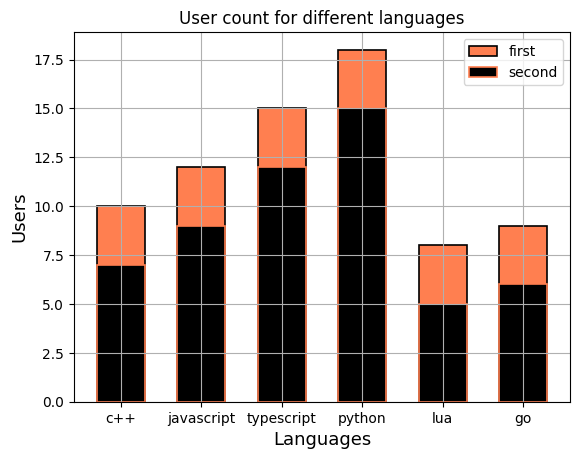

In [25]:
# BAR PLOT: used to compare same values across different categories (usually frequency)

data = {
    'users': [10, 12, 15, 18, 8, 9],
    'language': ['c++', 'javascript', 'typescript', 'python', 'lua', 'go']
}

# can provide an array of widths and a value for color
# plt.bar(x=data['language'], height=data['users'], color='r', width=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# or a single width value (or different values for colors)
plt.bar(
    x=data['language'],
    height=data['users'],
    color='coral',
    width=0.6,
    edgecolor='black',
    linewidth=1.2,
    label='first'
)
plt.bar(
    x=data['language'],
    height=list(map(lambda val: val-3, data['users'])),
    width=0.6,
    color='black',
    edgecolor='coral',
    linewidth=1.2,
    label='second'
)
plt.xlabel('Languages', fontsize=13)
plt.ylabel('Users', fontsize=13)
# plt.legend(['users', 'users - 3'])
plt.legend()
# plt.legend()
plt.title('User count for different languages')
plt.grid()
plt.show()

In [26]:
# SCATTER PLOT: used to find correlation between two variables, 
# clustering, multi variate purposes and also to identify outliers

df = pd.read_csv('StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'Comparing Reading and Math scores of every student')

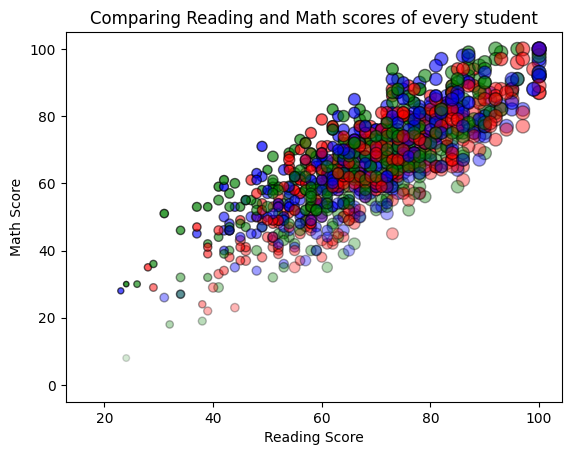

In [27]:
df['average'] = np.round((df['math score'] + df['reading score'] + df['writing score']) / 3, 2)

colors = ['r', 'g', 'b']
marker = ['o'] # '*'

plt.scatter(y=df['math score'], x=df['reading score'], sizes=df['writing score'], color=np.random.choice(colors, len(df)), marker=np.random.choice(marker), edgecolor='black', alpha=df['math score'] / (df['reading score'] + df['writing score']))
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Comparing Reading and Math scores of every student')

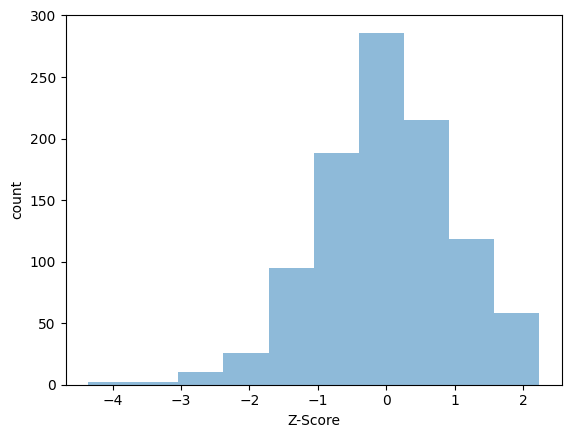

In [28]:
# HISTOGRAMS: usually used to check data distribution, detect outliers and visiaulize normalized data

normalized = (df['math score'] - df['math score'].mean()) / df['math score'].std()

plt.hist(x=normalized, alpha=0.5)
plt.xlabel('Z-Score')
plt.ylabel('count')
plt.show()

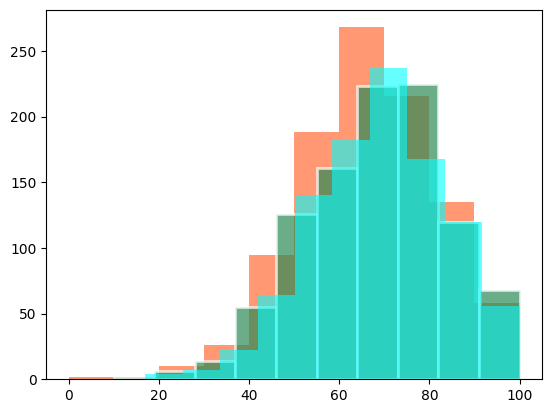

C:\Users\Dell\AppData\Local\Temp\ipykernel_9536\1924899167.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perf = df.groupby('performance').size()


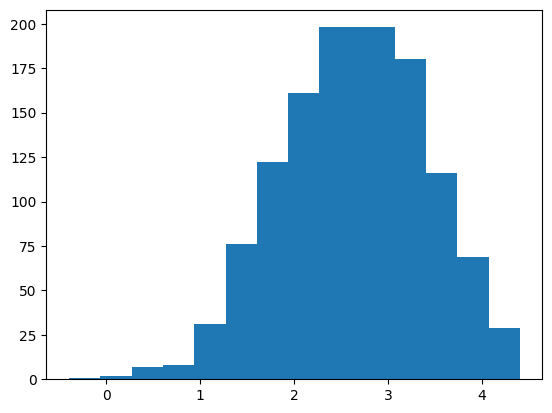

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,3.00
1,female,group C,some college,standard,completed,69,90,88,82.33,3.33
2,female,group B,master's degree,standard,none,90,95,93,92.67,3.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,1.67
4,male,group C,some college,standard,none,76,78,75,76.33,3.00
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,4.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33,2.00
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,2.33
998,female,group D,some college,standard,completed,68,78,77,74.33,3.00


In [29]:
plt.hist(x=df['math score'], color='coral', alpha=0.7+0.1)
plt.hist(x=df['writing score'], color='seagreen', alpha=0.6+0.1, edgecolor='white', linewidth=2)
plt.hist(x=df['reading score'], color='aqua', alpha=0.5+0.1)
plt.show()

GPAs = np.round(np.linspace(0, 4, 13), 2)
df['performance'] = pd.cut(x=df['average'], bins=len(GPAs), labels=GPAs)
perf = df.groupby('performance').size()
plt.bar(x=perf.index, height=perf.values)
plt.show()
df

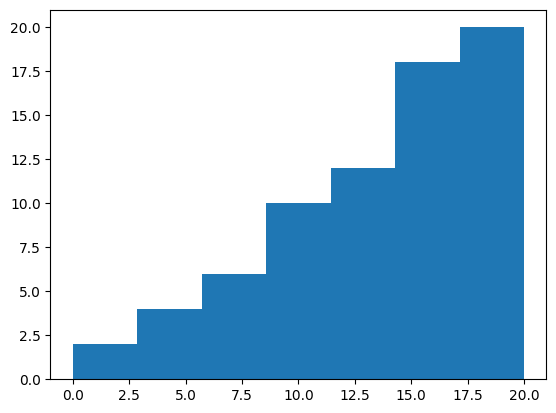

array([ 2,  2,  4,  5,  7,  8, 10, 10, 10, 11, 12, 14, 15, 15, 16, 16, 16,
       17, 18, 18], dtype=int32)

In [30]:
arr = np.random.randint(1, 20, 20)

plt.hist(arr, "auto", (0, 20), cumulative=1)
plt.show()
arr.sort()
arr

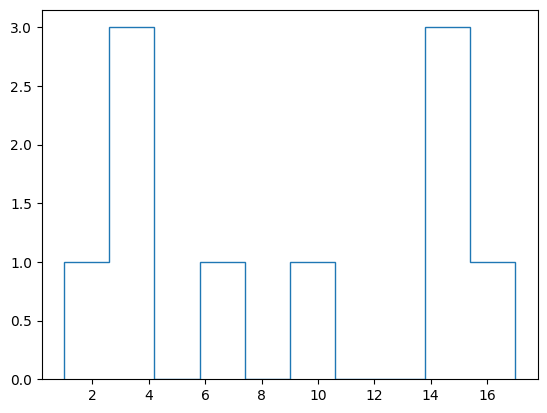

array([ 1,  3,  3,  3,  7,  9, 15, 15, 15, 17], dtype=int32)

In [31]:
arr = np.random.randint(0, 20, 10)
arr.sort()

plt.hist(arr, histtype='step')
plt.show()
arr

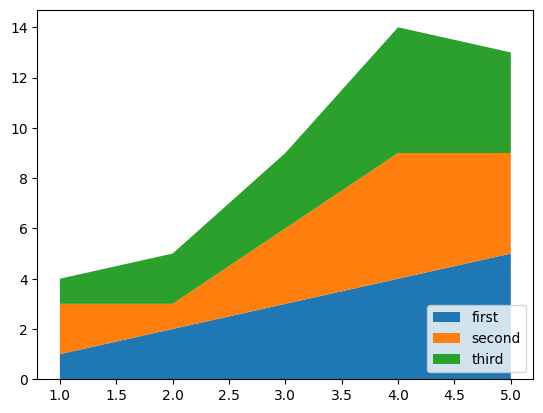

In [32]:
x = [1, 2, 3, 4, 5]

plt.stackplot(x, [1, 2, 3, 4, 5], [2, 1, 3, 5, 4], [1, 2, 3, 5, 4], labels=['first', 'second', 'third'])
plt.legend(loc=4)

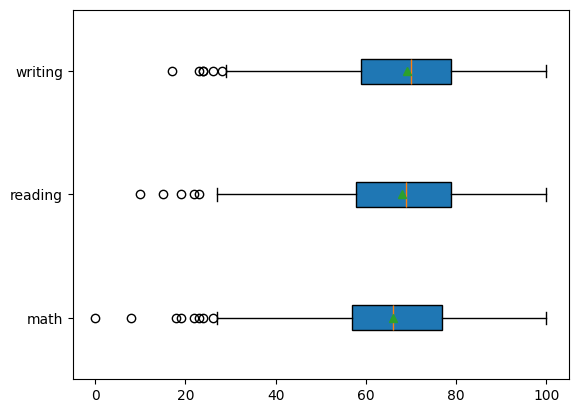

In [54]:
plt.boxplot(
    (df['math score'], df['writing score'], df['reading score']),
    tick_labels=['math', 'reading', 'writing'],
    widths=0.2,
    vert=False,
    patch_artist=True,
    showmeans=True
)
plt.show()

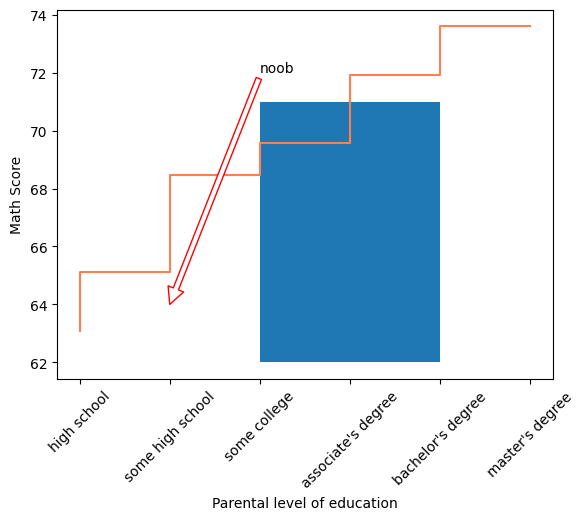

In [131]:
peducation = df.groupby('parental level of education').agg({ 'average': 'mean' }).reset_index()
peducation.sort_values(by='average', ascending=True, inplace=True)
plt.step(peducation['parental level of education'], peducation['average'], color='coral')
plt.xticks(rotation=45)
plt.fill_between(('some college', 'bachelor\'s degree'), 71, 62)
# plt.text("master's degree", 72, 'damn', fontdict={ 'fontsize': 20, 'color': 'red', 'fontfamily': 'monospace' })
plt.annotate('noob', xy=(1, 64), xytext=(2, 72), arrowprops=dict(facecolor='white', edgecolor='red'))
plt.xlabel('Parental level of education')
plt.ylabel('Math Score')
plt.show()